## Import libraries and init

In [9]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'

In [10]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

## Load ntuples from analyzer

In [3]:
masses = [('60','20'),('6p0','2p0'),('52p5','5p0'),('5p25','0p5')]
ctaus = [10]#, 10, 100, 1000]
cuts = np.arange(0,6)
# triggerPath = 'TRIG_dsa_HLT_DoubleMu3_DCA_PFMET50_PFMHT60'
branchPath = 'SREffi_dsa'
baseDir = '../Firefighter/washAOD/'
fileName = lambda Mchi, dMchi, ctau: baseDir + f'Mchi-{Mchi}_dMchi-{dMchi}_ctau-{ctau}.root'

numParams = len(masses)*len(ctaus)
countMasses = 0

dfs = OrderedDict({})
genInfo = OrderedDict({})
numEvents = OrderedDict({})
for (Mchi, dMchi) in masses:
    countCtaus = 1
    dfs[Mchi] = OrderedDict({})
    numEvents[Mchi] = OrderedDict({})
    genInfo[Mchi] = OrderedDict({})
    for ctau in ctaus:
        dfs[Mchi][ctau] = OrderedDict({})
        genInfo[Mchi][ctau] = uproot.open(fileName(Mchi, dMchi, ctau))['GEN/gen'].pandas.df()
        for cut in cuts:
            dfs[Mchi][ctau][cut] = uproot.open(fileName(Mchi, dMchi, ctau))[branchPath + f'/cut{cut}'].pandas.df()
        print(f'{countMasses*len(ctaus)+countCtaus} of {numParams}: ' + fileName(Mchi, dMchi, ctau))
        countCtaus += 1
    countMasses += 1

KeyboardInterrupt: 

In [10]:
masses = [('60','20'),('5p25','0p5'),('6p0','2p0'),('52p5','5p0')]
ctaus = [10]#, 10, 100, 1000]
cuts = np.arange(0,1)
# triggerPath = 'TRIG_dsa_HLT_DoubleMu3_DCA_PFMET50_PFMHT60'
branchPath = 'SREffi_dsa'
baseDir = '../Firefighter/washAOD/SignalRegionStudies/AfterGenFilter/'
fileName = lambda Mchi, dMchi, ctau: baseDir + f'Mchi-{Mchi}_dMchi-{dMchi}_ctau-{ctau}.root'

numParams = len(masses)*len(ctaus)
countMasses = 0

dfs = OrderedDict({})
genInfo = OrderedDict({})
numEvents = OrderedDict({})
for (Mchi, dMchi) in masses:
    countCtaus = 1
    dfs[Mchi] = OrderedDict({})
    numEvents[Mchi] = OrderedDict({})
    genInfo[Mchi] = OrderedDict({})
    for ctau in ctaus:
        dfs[Mchi][ctau] = OrderedDict({})
        genInfo[Mchi][ctau] = uproot.open(fileName(Mchi, dMchi, ctau))['GEN/gen'].pandas.df()
        for cut in cuts:
            dfs[Mchi][ctau][cut] = uproot.open(fileName(Mchi, dMchi, ctau))[branchPath + f'/cut{cut}'].pandas.df()
        print(f'{countMasses*len(ctaus)+countCtaus} of {numParams}: ' + fileName(Mchi, dMchi, ctau))
        countCtaus += 1
    countMasses += 1

1 of 4: ../Firefighter/washAOD/SignalRegionStudies/AfterGenFilter/Mchi-60_dMchi-20_ctau-10.root
2 of 4: ../Firefighter/washAOD/SignalRegionStudies/AfterGenFilter/Mchi-5p25_dMchi-0p5_ctau-10.root
3 of 4: ../Firefighter/washAOD/SignalRegionStudies/AfterGenFilter/Mchi-6p0_dMchi-2p0_ctau-10.root
4 of 4: ../Firefighter/washAOD/SignalRegionStudies/AfterGenFilter/Mchi-52p5_dMchi-5p0_ctau-10.root


In [97]:
testdfs = uproot.open("../Firefighter/washAOD/SROptimization/beforeFixingDxy/Mchi-60p0_dMchi-20p0_ctau-10.root")['SREffi_dsa' + f'/cutsTree'].pandas.df()

In [98]:
testdf2 = uproot.open("../Firefighter/washAOD/SROptimization/Mchi-60p0_dMchi-20p0_ctau-10.root")['SREffi_dsa' + f'/cutsTree'].pandas.df()

In [99]:
print(len(testdf2.query('subentry==0')['recoPt']))
print(len(testdf2.query('subentry==0')['recoPt'].dropna()))
print(len(testdf2.query('subentry==0')[['recoPt']].query('recoPt>5')))
print()
print(len(testdf2.query('subentry==1')[['recoPt']]))
print(len(testdf2.query('subentry==1')[['recoPt']].dropna()))
print(len(testdf2.query('subentry==1')[['recoPt']].query('recoPt>5')))
print()
print(len(testdf2.query('subentry==0')[['recoVxy']]))
print(len(testdf2.query('subentry==0')[['recoVxy']].dropna()))

73968
65532
59393

73627
44229
29825

73968
44229


In [100]:
print(len(testdfs.query('subentry==0')['recoPt']))
print(len(testdfs.query('subentry==0')['recoPt'].dropna()))
print(len(testdfs.query('subentry==0')[['recoPt']].query('recoPt>5')))
print()
print(len(testdfs.query('subentry==1')[['recoPt']]))
print(len(testdfs.query('subentry==1')[['recoPt']].dropna()))
print(len(testdfs.query('subentry==1')[['recoPt']].query('recoPt>5')))
print()
print(len(testdfs.query('subentry==0')[['recoVxy']]))
print(len(testdfs.query('subentry==0')[['recoVxy']].dropna()))

73968
65532
59393

73627
44229
29825

73968
44229


In [101]:
print(len(testdf2.query('subentry==1')[['recoPt','recoDxy']]))
print(len(testdf2.query('subentry==1')[['recoPt','recoDxy']].dropna()))
print(len(testdf2.query('subentry==1')[['recoPt','recoDxy']].loc[ testdf2.recoPt > 5 ]))
print(len(testdf2.query('subentry==1')[['recoPt','recoDxy']].loc[(testdf2.recoPt > 5) & (0.1 < testdf2.recoDxy.abs()) & (700 > testdf2.recoDxy.abs())]))

73627
44229
29825
29532


In [102]:
mchi='60p0'
cutFlowDict = OrderedDict()
# for mchi in ['5p25','6p0','52p5','60']:
cutFlowDict[mchi] = []
cutsCrit = [ testdfs[f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
for cut in np.arange(0,6):
    cutsToApply = reduce(operator.and_, cutsCrit[0:cut+1])
    cutFlowDict[mchi].append(len(testdfs[cutsToApply]))
        
cutFlowDf = pd.DataFrame.from_dict(cutFlowDict)
cutFlowDf

,60p0
0,73968
1,21571
2,13698
3,5186
4,1262
5,611


In [103]:
mchi='60p0'
cutFlowDict = OrderedDict()
# for mchi in ['5p25','6p0','52p5','60']:
cutFlowDict[mchi] = []
cutsCrit = [ testdf2[f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
for cut in np.arange(0,6):
    cutsToApply = reduce(operator.and_, cutsCrit[0:cut+1])
    cutFlowDict[mchi].append(len(testdf2[cutsToApply]))
        
cutFlowDf = pd.DataFrame.from_dict(cutFlowDict)
cutFlowDf

,60p0
0,73968
1,21571
2,13698
3,10688
4,5165
5,2463


In [104]:
mchi = '60p0'
cutFlowDict = OrderedDict()
# for mchi in ['5p25','6p0','52p5','60']:
cutFlowDict[mchi] = []
cutsCrit = [ testdfs[f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
for cut in np.arange(0,6):
    cutsToApply = cutsCrit[cut]
    cutFlowDict[mchi].append(len(testdfs[cutsToApply]))
        
cutFlowDf = pd.DataFrame.from_dict(cutFlowDict)
cutFlowDf

,60p0
0,73968
1,21571
2,28861
3,29044
4,14268
5,14902


In [105]:
mchi = '60p0'
cutFlowDict = OrderedDict()
# for mchi in ['5p25','6p0','52p5','60']:
cutFlowDict[mchi] = []
cutsCrit = [ testdf2[f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
for cut in np.arange(0,6):
    cutsToApply = cutsCrit[cut]
    cutFlowDict[mchi].append(len(testdf2[cutsToApply]))
        
cutFlowDf = pd.DataFrame.from_dict(cutFlowDict)
cutFlowDf

,60p0
0,73968
1,21571
2,28861
3,58544
4,28538
5,14902


## Inspect data

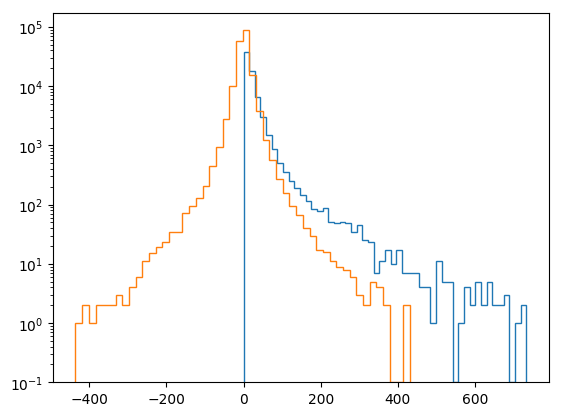

In [95]:
plt.hist(dfs['60'][10][0]['recoVxy'].dropna(), bins=50, log=True, histtype='step', density=False);
plt.hist(dfs['60'][10][0]['recoDxy'].dropna(), bins=50, log=True, histtype='step', density=False);

In [12]:
from functools import reduce
import operator

## Inclusive cuts

In [57]:
mchi='5p25'
cutFlowDict = OrderedDict()
for mchi in ['5p25','6p0','52p5','60']:
    cutFlowDict[mchi] = []
    cutsCrit = [ dfs[mchi][10][0][f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
    for cut in np.arange(0,6):
        cutsToApply = reduce(operator.and_, cutsCrit[0:cut+1])
        cutFlowDict[mchi].append(len(dfs[mchi][10][0][cutsToApply]))
        
cutFlowDf = pd.DataFrame.from_dict(cutFlowDict)
cutFlowDf

,5p25,6p0,52p5,60
0,2408,1882,30764,24729
1,391,298,8497,6295
2,301,179,6356,4243
3,44,61,1486,1602
4,2,16,162,378
5,2,13,108,154


## Exclusive cuts

In [58]:
cutFlowDict = OrderedDict()
for mchi in ['5p25','6p0','52p5','60']:
    cutFlowDict[mchi] = []
    cutsCrit = [ dfs[mchi][10][0][f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
    for cut in np.arange(0,6):
        cutsToApply = cutsCrit[cut]
        cutFlowDict[mchi].append(len(dfs[mchi][10][0][cutsToApply]))
        
cutFlowDf = pd.DataFrame.from_dict(cutFlowDict)
cutFlowDf

,5p25,6p0,52p5,60
0,2408,1882,30764,24729
1,391,298,8497,6295
2,661,538,10849,8815
3,184,526,5267,9410
4,23,152,954,4357
5,353,703,3525,4194


(array([  4.90940000e+04,   4.62070000e+04,   2.01150000e+04,
          8.31800000e+03,   3.23000000e+03,   1.18100000e+03,
          4.86000000e+02,   2.36000000e+02,   1.20000000e+02,
          5.70000000e+01,   3.60000000e+01,   2.10000000e+01,
          1.80000000e+01,   1.10000000e+01,   5.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

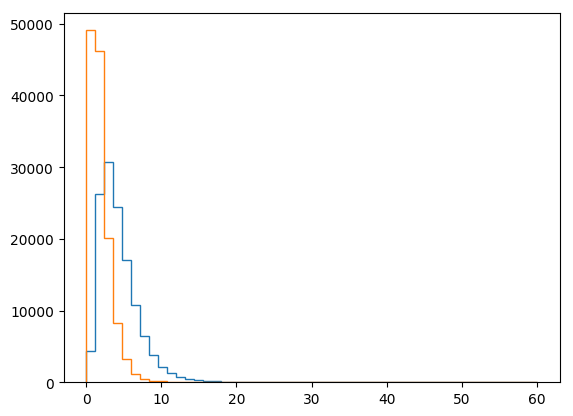

In [33]:
# plt.hist(genInfo['60'][10].query('subentry==5 | subentry==6')['pt'].groupby(level=0).max(),bins=50,range=(0,60),histtype='step')
# plt.hist(genInfo['60'][10].query('subentry==5 | subentry==6')['pt'].groupby(level=0).min(),bins=50,range=(0,60),histtype='step')
plt.hist(genInfo['52p5'][10].query('pid==13|pid==-13')['pt'].groupby(level=0).max(),bins=50,range=(0,60),histtype='step')
plt.hist(genInfo['52p5'][10].query('pid==13|pid==-13')['pt'].groupby(level=0).min(),bins=50,range=(0,60),histtype='step')

In [73]:
genInfo['52p5'][10].query('pid==13|pid==-13')[['pt','eta']]

pt       eta
entry  subentry                     
0      5          3.480264 -3.487250
       6          3.594287 -2.904247
1      5          3.031765 -0.498938
       6          3.463977 -0.850176
2      5          1.361694  0.519395
       6          2.132331 -0.109887
3      5          3.209465  0.933093
       6          2.025694  2.086698
4      5          2.172541 -3.167156
       6          7.469926 -3.479661
5      5          1.782413 -3.915800
       6          0.436166 -3.376321
6      5          1.101248 -0.767760
       6          1.216274 -0.595606
7      5          4.595019  0.891050
       6          3.554034  1.009672
8      5          0.779575  4.136937
       6          2.260388  4.524320
9      5          1.448473  0.291358
       6          7.375788  1.205871
10     5          0.501092 -0.365388
       6          4.342004  0.802435
11     5          3.919514  0.829016
       6          6.006886  0.954352
12     5          3.204548 -3.617925
       6          0.339909 -4.333295
13     5          0.116598 -1.318159
       6          2.921670 -2.833591
14     5          1.444763 -3.725561
       6          0.476689 -4.250031
...                    ...       ...
129137 5          0.865210  0.915508
       6          3.291777  2.191305
129138 5          4.120025  2.625083
       6          1.440678  2.819223
129139 5          7.941375  0.180853
       6          1.030036 -1.005492
129140 5          2.114573 -2.107916
       6          0.475201 -3.083254
129141 5          2.690896  0.125530
       6          1.925618 -0.757316
129142 5          2.348363 -0.544079
       6          0.845996 -1.154637
129143 5          4.391584  1.940117
       6          1.838553  1.633363
129144 5          1.800572  1.468593
       6          0.523215  1.507753
129145 5          1.683676 -0.422438
       6          0.913787 -2.202840
129146 5          3.188556  1.066845
       6          1.972749  1.380764
129147 5          3.697314  0.020877
       6          0.776062  0.514086
129148 5          2.128146  1.154033
       6          2.436880  0.708314
129149 5          6.974243 -0.542010
       6         18.357252 -0.364883
129150 5          3.818785  2.259579
       6          8.015634  2.259438
129151 5          1.920860  2.430037
       6          1.506024  3.505173

[258304 rows x 2 columns]

(array([    0.,     0.,     4.,    21.,   104.,   342.,   691.,   979.,
         1182.,  1385.,  1601.,  1556.,  1531.,  1488.,  1311.,  1108.,
          991.,   896.,   788.,   686.,   631.,   529.,   458.,   454.,
          452.,   458.,   502.,   562.,   771.,   564.,   508.,   478.,
          407.,   347.,   248.,   180.,   103.,    89.,    86.,    75.,
           59.,    68.,    45.,    59.,    43.,    35.,    39.,    29.,
           24.,    25.]),
 array([  0. ,   0.4,   0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,
          3.6,   4. ,   4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,
          7.2,   7.6,   8. ,   8.4,   8.8,   9.2,   9.6,  10. ,  10.4,
         10.8,  11.2,  11.6,  12. ,  12.4,  12.8,  13.2,  13.6,  14. ,
         14.4,  14.8,  15.2,  15.6,  16. ,  16.4,  16.8,  17.2,  17.6,
         18. ,  18.4,  18.8,  19.2,  19.6,  20. ]),
 <a list of 1 Patch objects>)

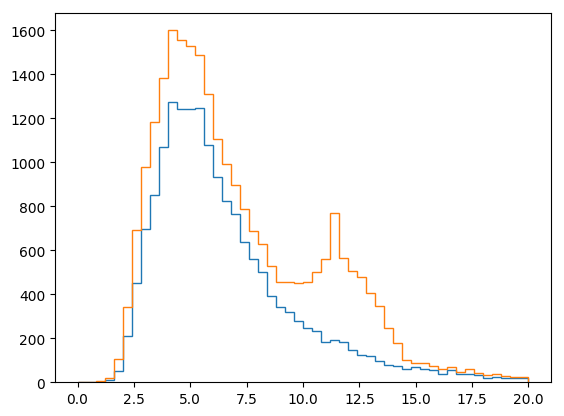

## Plot everything together

To plot individual plots separately, copy relevant block of code and replace "axes[i,j]" with "plt", and take note that some of the functions change name, e.g. axes[i,j].set_xlabel() --> plt.xlabel() and axes[i,j].set_ylim() --> plt.ylim().

The other option is to copy the block and add "fig, ax = plt.subplots(1,1)" at the top, and then do the replacement axes[i,j] --> ax elsewhere.

### Some plotting helper functions

In [61]:
insets = True
build='stepfilled'
iheight="65%"
iwidth="45%"

def plot_inset(data, axis, kwargs={}):
    if 'bins' not in kwargs: kwargs['bins'] = 10
    if 'histtype' not in kwargs: kwargs['histtype'] = build
    if insets:
        axins = inset_axes(axis, width=iwidth, height=iheight)
        for (cut,datum) in enumerate(data):
            ret = axins.hist(datum, **kwargs)
            if cut == 1:
                axins.set_ylim(0,1.1*max(ret[0]))
        return axins

def plot_full(data, axis, kwargs={}, labels = []):
    if 'bins' not in kwargs: kwargs['bins'] = 50
    if 'histtype' not in kwargs: kwargs['histtype'] = build 
    for (cut,datum) in enumerate(data):
        if len(labels) > 0:
            axis.hist(datum, label=labels[cut], **kwargs)
        else:
            axis.hist(datum, **kwargs)

### Plot MET and jet variables, and cut-flow histo

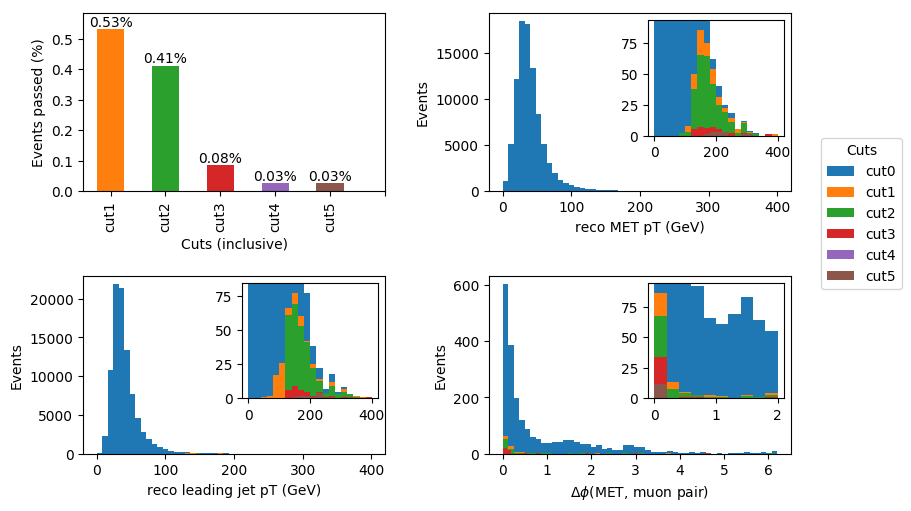

In [175]:
mchi = '5p25'

### Make subplot axes
fig, axes = plt.subplots(2,2, figsize=(8,5))
for row in axes:
    for col in row:
        col.set_ylabel('Events')
# fig.suptitle("Signal region efficiency for m1 = 50 GeV, m2 = 55 GeV")
# fig.subplots_adjust(top=0.92)
plt.tight_layout(h_pad=4.0, w_pad=3.0)
# axes[1, 1].axis('off')

### Histogram cut-flow of passing events 
counts = []
for cut in cuts:
    count = len(dfs[mchi][10][cut]['recoPFMetPt'])
    norm = len(dfs[mchi][10][0]['recoPFMetPt'])
    counts.append(100*count/norm)
axlabels = [f'cut{cut}' for cut in cuts[1:]]
countseries = pd.Series.from_array(counts[1:])

countseries.plot(ax=axes[0,0],kind='bar',color=['C1','C2','C3','C4','C5'])
axes[0,0].set_xlabel('Cuts (inclusive)')
axes[0,0].set_ylabel('Events passed (%)')
axes[0,0].set_xticklabels(axlabels)
axes[0,0].set_xticks(np.arange(0,len(cuts)))
axes[0,0].set_ylim(0, 1.1*max(counts[1:]))

rects = axes[0,0].patches

labels = ["%.2f%%" % counts[i] for i in np.arange(1,len(rects)+1)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    axes[0,0].text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')
    
### reco MET pT
axes[0,1].set_xlabel('reco MET pT (GeV)')
data = [dfs[mchi][10][cut]['recoPFMetPt'].dropna() for cut in cuts]
labels = [f'cut{cut}' for cut in cuts]
plot_full(data, axes[0,1], dict({'range':(0,400)}), labels=labels)
plot_inset(data, axes[0,1], dict({'range':(0,400),'bins':20}))

### reco leading jet pT
axes[1,0].set_xlabel('reco leading jet pT (GeV)')
data = [dfs[mchi][10][cut]['recoPFJetPt'].dropna() for cut in cuts]
plot_full(data, axes[1,0], dict({'range':(0,400)}))
plot_inset(data, axes[1,0], dict({'range':(0,400), 'bins':20}))

### DeltaPhi b/w MET and muon pair
axes[1,1].set_xlabel(r'$\Delta\phi$(MET, muon pair)')
data = [abs((dfs[mchi][10][cut]['recoPFMetPhi'].dropna() - 
            dfs[mchi][10][cut]['recoPhi'].groupby(level=0).mean()).dropna()) for cut in cuts]
plot_full(data, axes[1,1])
plot_inset(data, axes[1,1], dict({'range':(0,2)}))
    
### Make and place legend w.r.t. axis[0,1] (upper right)
# axes[0,1].legend(loc=(0.3,-1.5), title='Cuts')
axes[0,1].legend(loc=(1.1,-0.55), title='Cuts')

### Plot muon-related variables

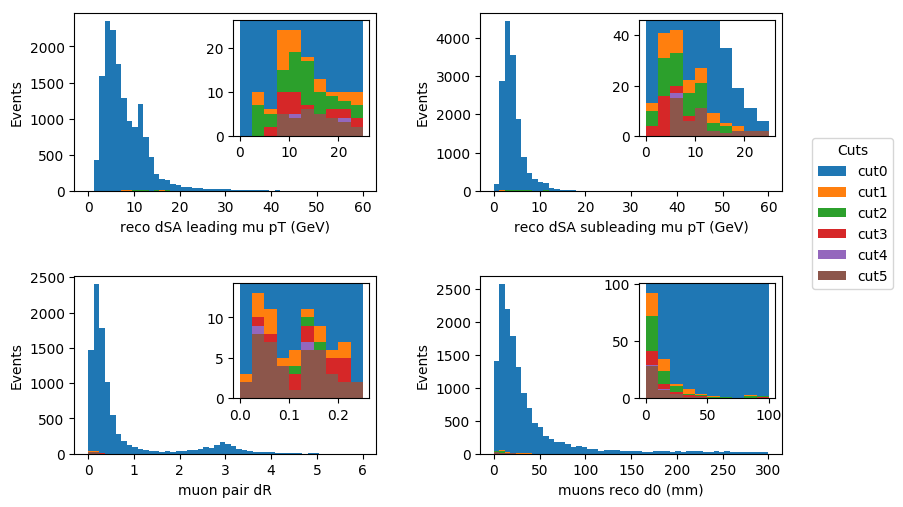

In [173]:
mchi = '6p0'

fig, axes = plt.subplots(2,2, figsize=(8,5))
for row in axes:
    for col in row:
        col.set_ylabel('Events')
plt.tight_layout(h_pad=4.0, w_pad=3.0)

### reco dSA leading muon pT
axes[0,0].set_xlabel('reco dSA leading mu pT (GeV)')
data = [dfs[mchi][10][cut].query('subentry==0')['recoPt'].dropna() for cut in cuts]
plot_full(data, axes[0,0], dict({'range':(0,60)}))
plot_inset(data, axes[0,0], dict({'bins':10,'range':(0,25)}))

### reco dSA subleading muon pT
axes[0,1].set_xlabel('reco dSA subleading mu pT (GeV)')
data = [dfs[mchi][10][cut].query('subentry==1')['recoPt'].dropna() for cut in cuts]
labels = [f'cut{cut}' for cut in cuts]
plot_full(data, axes[0,1], dict({'range':(0,60)}), labels=labels)
plot_inset(data, axes[0,1], dict({'bins':10,'range':(0,25)}))

### muon deltaR
axes[1,0].set_xlabel('muon pair dR')
data = [dfs[mchi][10][cut]['deltaR'].dropna() for cut in cuts]
plot_full(data, axes[1,0], dict({'range':(0,6)}))
plot_inset(data, axes[1,0], dict({'bins':10,'range':(0,0.25)}))

### muon d0 (leading)
axes[1,1].set_xlabel('muons reco d0 (mm)')
data = [np.sqrt(dfs[mchi][10][cut].query('subentry==0')['recoDz'].dropna()**2 + 
                dfs[mchi][10][cut].query('subentry==0')['recoDxy'].dropna()**2) for cut in cuts]
plot_full(data, axes[1,1], dict({'range':(0,300)}))
# axes[1,1].set_ylim(0,1000)
plot_inset(data, axes[1,1], dict({'range':(0,100)}))

### Make and place legend w.r.t. axis[0,1] (upper right)
axes[0,1].legend(loc=(1.1,-0.55), title='Cuts')


## Cut-flow table (old, keep just for comparison, no gen-filter)

In [176]:
cutflow = OrderedDict({})
for m in ['5p25','6p0','52p5','60']:
    counts = []
    for cut in cuts:
        count = len(dfs[m][10][cut]['recoPFMetPt'])
        norm = len(dfs[m][10][0]['recoPFMetPt'])
        counts.append(count)
        countseries = pd.Series.from_array(counts[1:])
        cutflow[m]=counts

cutflowdf = pd.DataFrame.from_dict(cutflow)
cutflowdf

,5p25,6p0,52p5,60
0,93171,108293,154809,207580
1,496,453,10120,9578
2,384,345,7510,6262
3,78,136,2354,4112
4,24,86,706,570
5,24,82,512,364
